In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from flaml import AutoML
import lightgbm as lgb
import xgboost as xgb

%reload_ext kedro.ipython
%reload_kedro
%matplotlib inline

[09/02/24 13:50:59] INFO     Registered line magic '%reload_kedro'                                   ]8;id=54469;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=433034;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#58\58]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=944696;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=979537;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#60\60]8;;\

                    INFO     Resolved project path as:                                              ]8;id=198977;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=974428;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#171\171]8;;\
                             c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predi                
                             ctions\goodreads-predictor.                                                           
                             To set a different path, run '%reload_kedro <project_root>'                           

[09/02/24 13:51:01] INFO     Kedro project goodreads-predictor                                      ]8;id=682156;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=406284;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=303527;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=510161;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#142\142]8;;\
                             'pipelines'                                                                           

[09/02/24 13:51:02] INFO     Registered line magic 'run_viz'                                        ]8;id=462239;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=840227;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#148\148]8;;\

                    INFO     Resolved project path as:                                              ]8;id=359747;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=798537;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#171\171]8;;\
                             C:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predi                
                             ctions\goodreads-predictor.                                                           
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Kedro project goodreads-predictor                                      ]8;id=823500;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=550400;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=208738;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=909244;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#142\142]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=866307;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=526809;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#148\148]8;;\

In [3]:
train_data = catalog.load("model_train")
test_data = catalog.load("model_test")
valid_data = catalog.load("model_valid")

                    INFO     Loading data from model_train (ParquetDataset)...                  ]8;id=82876;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=251028;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from model_test (ParquetDataset)...                   ]8;id=970738;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=807293;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from model_valid (ParquetDataset)...                  ]8;id=34347;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=725362;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

In [4]:
train_data.columns


Index(['title', 'isbn', 'most_common_author', 'publisher', 'language_code',
       'Description', 'genre', 'AuthorFameLevel', 'book_count_category',
       'publisher_book_count_category', 'PublisherPriceCategory',
       'book_length_category', 'engagement_level', 'isbn13', 'average_rating',
       'num_pages', 'ratings_count', 'text_reviews_count', 'Price',
       'DescriptionISBN', 'text_reviews_percentage', 'stratify_col'],
      dtype='object')

In [5]:
FEATURES = ['most_common_author', 'publisher', 'language_code', 'num_pages', 'ratings_count', 'text_reviews_count', 'Price', 'genre',
            'AuthorFameLevel', 'book_count_category', 'publisher_book_count_category', 'PublisherPriceCategory', 'book_length_category', 'engagement_level']
TARGET = 'average_rating'

X_train = train_data[FEATURES]
y_train = train_data[TARGET]

X_valid = valid_data[FEATURES]
y_valid = valid_data[TARGET]

X_test = test_data[FEATURES]
y_test = test_data[TARGET]

In [6]:
automl = AutoML()

TRAIN_MINUTES = 1

settings = {
    "time_budget": 60 * TRAIN_MINUTES,
    "metric": "r2",
    "task": "regression",
    'estimator_list': ['lgbm', 'xgb_limitdepth'],
}

automl.fit(X_train, y_train, X_val = X_valid, y_val = y_valid, **settings)

[flaml.automl.logger: 09-02 13:51:02] {1680} INFO - task = regression
[flaml.automl.logger: 09-02 13:51:02] {1688} INFO - Data split method: uniform
[flaml.automl.logger: 09-02 13:51:02] {1691} INFO - Evaluation method: holdout
[flaml.automl.logger: 09-02 13:51:02] {1789} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 09-02 13:51:02] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'xgb_limitdepth']
[flaml.automl.logger: 09-02 13:51:02] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 09-02 13:51:03] {2345} INFO - Estimated sufficient time budget=572s. Estimated necessary time budget=4s.
[flaml.automl.logger: 09-02 13:51:03] {2392} INFO -  at 0.1s,	estimator lgbm's best error=0.9470,	best estimator lgbm's best error=0.9470
[flaml.automl.logger: 09-02 13:51:03] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 09-02 13:51:03] {2392} INFO -  at 0.2s,	estimator lgbm's best error=0.9470,	best estimator lgbm's best error=0.9470
[

In [7]:
print(automl.best_estimator)
automl.best_config

xgb_limitdepth



{
    'n_estimators': 10,
    'max_depth': 5,
    'min_child_weight': 0.693764806375613,
    'learning_rate': 0.2463206784794336,
    'subsample': 0.9661106209889765,
    'colsample_bylevel': 0.9722620955509288,
    'colsample_bytree': 1.0,
    'reg_alpha': 0.0009765625,
    'reg_lambda': 0.19811028958171117
}

<Axes: title={'center': 'Feature Importance'}, ylabel='Feature'>

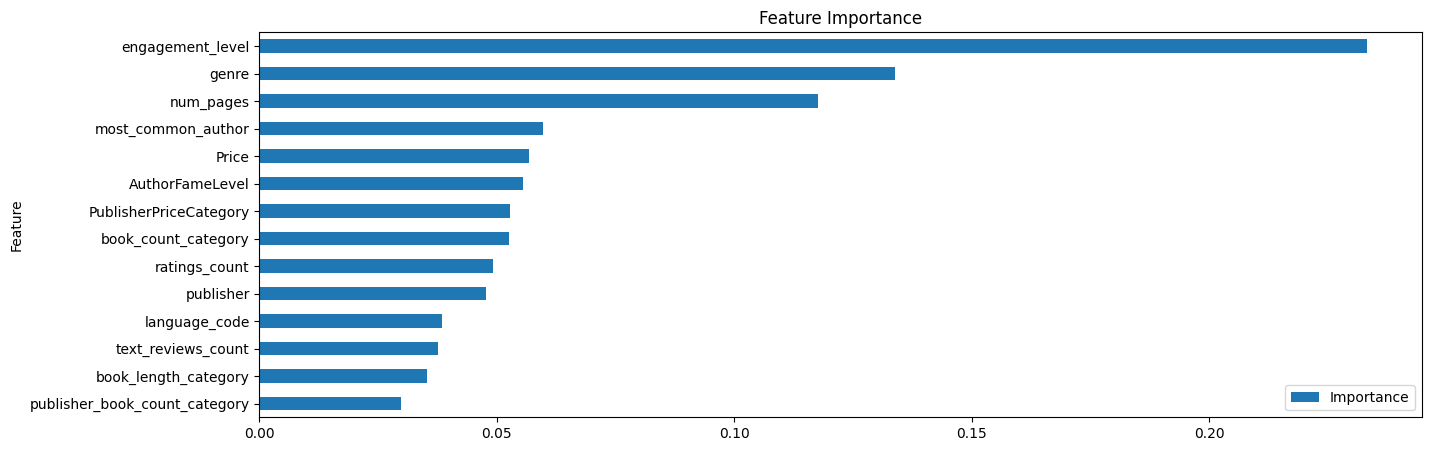

In [14]:
feat_imp = pd.DataFrame([{"Feature": feat, "Importance": imp} for feat, imp in zip(automl.feature_names_in_, automl.feature_importances_)]).sort_values(by="Importance", ascending=True)
feat_imp.plot(kind='barh', x='Feature', y='Importance', figsize=(15, 5), title='Feature Importance')

In [15]:
automl.score(X_train, y_train)

0.2958442790019489

In [16]:
automl.score(X_test, y_test)

0.21131407903523824

Text(0.5, 1.0, 'Actual vs Predicted Score')

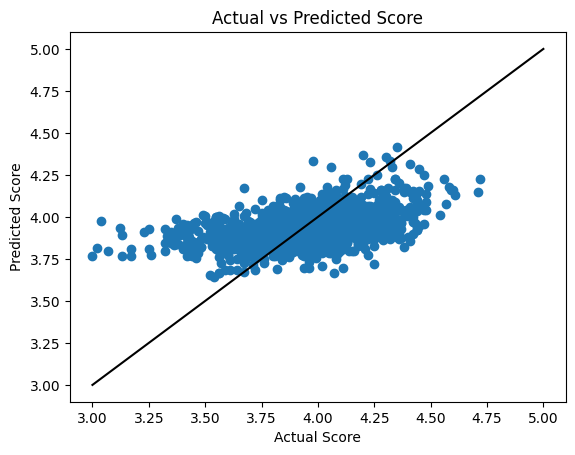

In [18]:
preds = automl.predict(X_test)
plt.scatter(y_test, preds)
plt.plot([3, 5], [3, 5], color='black')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Score')